In [263]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import numpy as np
import pycountry
import plotly.express as px
import bokeh.io
import bokeh.models
import bokeh.plotting
import statsmodels.api as sm
from scipy import stats
import powerlaw

# **Deforestation Data**

In [264]:
deforest_data = pd.read_excel("./Data/Deforest.xlsx")
deforest_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,NaN,NaN


In [265]:
# Count the number of zero values in each column
zero_counts = (deforest_data == 0).sum()
#If there are values in a column that are equal to zero, it is equal to 4
zero_counts.unique()

array([0, 4], dtype=int64)

In [266]:
deforest_data = deforest_data.drop(deforest_data[deforest_data["2019"] == 0]["Country Name"].index).reset_index(drop = True)
deforest_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Kosovo,XKX,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,"Yemen, Rep.",YEM,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,NaN,NaN
259,South Africa,ZAF,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.235127,14.205121,14.175115,14.145109,14.115103,14.085097,14.055091,14.025085,NaN,NaN
260,Zambia,ZMB,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.802392,61.549254,61.295955,61.042885,60.789707,60.536515,60.283337,60.030150,NaN,NaN


In [267]:
print("Number of countries in the deforestation dataset: ",len(deforest_data["Country Name"].unique()))

Number of countries in the deforestation dataset:  262


In [268]:
str_col_number = (deforest_data.dtypes == 'O').value_counts().iloc[1]
float_col_number = (deforest_data.dtypes == 'O').value_counts().iloc[0]
print(f"Number of string columns: {str_col_number}")
print(f"Number of float columns: {float_col_number}")

Number of string columns: 4
Number of float columns: 64


In [269]:
data_topic = deforest_data["Indicator Name"].unique()[0] #Unnecessary column
deforest_data = deforest_data.drop(["Indicator Name","Indicator Code"], axis = 1) #Dropping the column
print(f"Dataset topic: {data_topic}")

Dataset topic: Forest area (% of land area)


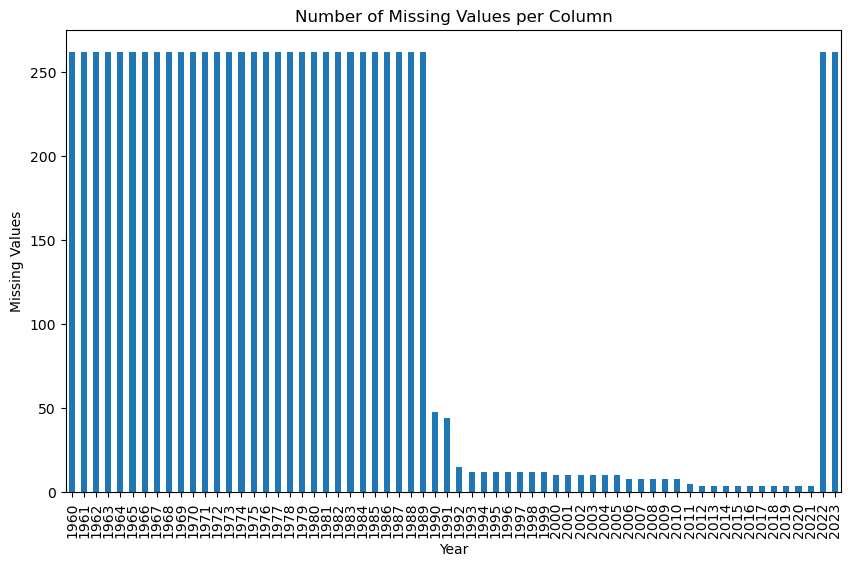

In [270]:
#Columns
# We will use regex to find all columns that represent years (assuming years are 4-digit numbers starting with '19' or '20').
year_columns = [col for col in deforest_data.columns if re.match(r'^\d{4}$', col)]

#Potting the missing values
plt.figure(figsize=(10, 6))  # You can adjust the (width, height) as needed
missing_values = deforest_data[year_columns].isnull().sum()
missing_values.plot(kind='bar', title='Number of Missing Values per Column', xlabel='Year', ylabel='Missing Values')

# Show the plot
plt.show()


In [271]:
all_missing_columns = deforest_data[year_columns].isnull().all()
# Filter out the columns that are entirely missing
columns_with_all_missing = all_missing_columns[all_missing_columns].index.tolist()
# Result: We don't have data for the years: 1960-1989 & 2022,2023

# Drop the columns that have all  
deforest_data = deforest_data.drop(columns_with_all_missing ,axis = 1)

#Converting the years to integers
deforest_data.rename(columns={col: int(col) for col in year_columns}, inplace=True)

#We want the data starting from 1999
columns_from_1999 = [col for col in deforest_data.columns if isinstance(col, int) and col >= 1999]

# Filter the DataFrame to include only the columns from the year 2000 onwards
data_with_desired_years = deforest_data[columns_from_1999]

#Joining the dataframes
final_deforest_data = deforest_data[["Country Name","Country Code"]].join(data_with_desired_years)
final_deforest_data.head()

,Country Name,Country Code,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333
1,Africa Eastern and Southern,AFE,34.868726,34.717473,34.537463,34.357452,34.177441,33.654274,33.475977,33.297802,...,31.890654,31.680635,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194
2,Afghanistan,AFG,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
3,Africa Western and Central,AFW,21.713446,21.595284,21.503156,21.411029,21.318902,21.226775,21.134648,21.042520,...,20.498099,20.410143,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037
4,Angola,AGO,62.456106,62.331443,61.886219,61.440995,60.995770,60.550546,60.105322,59.660098,...,56.988751,56.543526,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722


In [272]:
#Preliminary cleaning
final_deforest_data["Country Name"] = final_deforest_data["Country Name"] + " " + final_deforest_data["Country Code"]
final_deforest_data.reset_index(drop = True, inplace = True)

#Dropping some of the columns for clearer structure
df_cleaned = final_deforest_data.drop(columns='Country Code')

# Reshape the data using the melt function to create a long format
df_long = df_cleaned.melt(id_vars=['Country Name'], var_name='Year', value_name='Values')

# Convert 'Year' column to numeric if necessary (remove '.0' from the years)
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

#Adding the country code
df_long["Country Code"] = df_long["Country Name"].apply(lambda val:val.split(" ")[-1])
df_long["Country Name"] = df_long["Country Name"].apply(lambda val: " ".join(val.split(" ")[:-1]))

#Ordering the columns
df_long = df_long[["Country Name","Country Code","Year","Values"]]

df_long.head()

,Country Name,Country Code,Year,Values
0,Aruba,ABW,1999,2.333333
1,Africa Eastern and Southern,AFE,1999,34.868726
2,Afghanistan,AFG,1999,1.852782
3,Africa Western and Central,AFW,1999,21.713446
4,Angola,AGO,1999,62.456106


C:\Users\Mert\AppData\Local\Temp\ipykernel_25644\3049588538.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



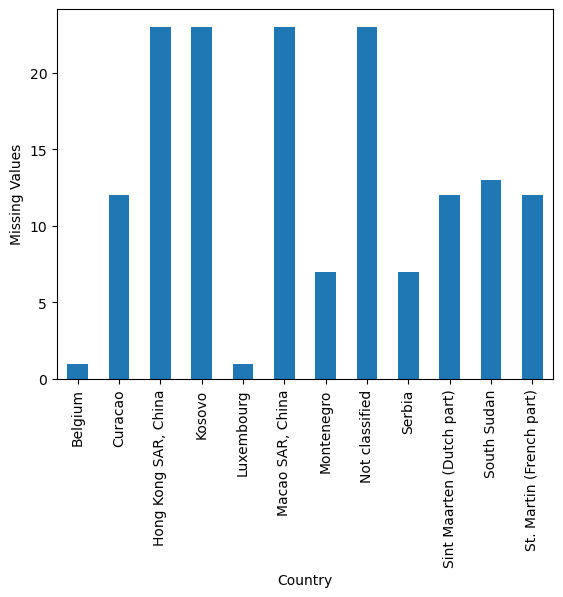

In [273]:
#Number of data points per each country
len_country = len(df_long[df_long["Country Name"] == "Switzerland"])

# Count the number of NaN values for each country
nan_count_per_country = df_long.groupby('Country Name').apply(lambda x: x.isna().sum())["Values"]

# Plot a bar plot of the 'nan_count_per_country' DataFrame
nan_count_per_country[nan_count_per_country > 0].plot(kind = 'bar', xlabel='Country', ylabel='Missing Values')

#These countries can be dropped
countries_dropped = nan_count_per_country[nan_count_per_country > 0].index


In [274]:
country_lst = nan_count_per_country[nan_count_per_country > 0].index.to_list()

#Dropping all the data related to countries above
df_cleaned = df_long[~df_long['Country Name'].isin(country_lst)]
#Some countries have missing values but not that much, drop the rows with missing values
df_cleaned = df_cleaned.dropna()

df_cleaned['Differenced_Value'] = df_cleaned.groupby('Country Name')['Values'].diff()

# Ensure that the 'Year' column is included for context
df_cleaned = df_cleaned[['Country Name', 'Year', 'Differenced_Value']]

#Remove the year 1999
df_cleaned = df_cleaned[~(df_cleaned["Year"] == 1999)]
df_cleaned = df_cleaned.reset_index(drop = True)
df_cleaned

,Country Name,Year,Differenced_Value
0,Aruba,2000,0.000000
1,Africa Eastern and Southern,2000,-0.151253
2,Afghanistan,2000,0.000000
3,Africa Western and Central,2000,-0.118162
4,Angola,2000,-0.124663
...,...,...,...
5495,Samoa,2021,-0.172662
5496,"Yemen, Rep.",2021,0.000000
5497,South Africa,2021,-0.030006
5498,Zambia,2021,-0.253187


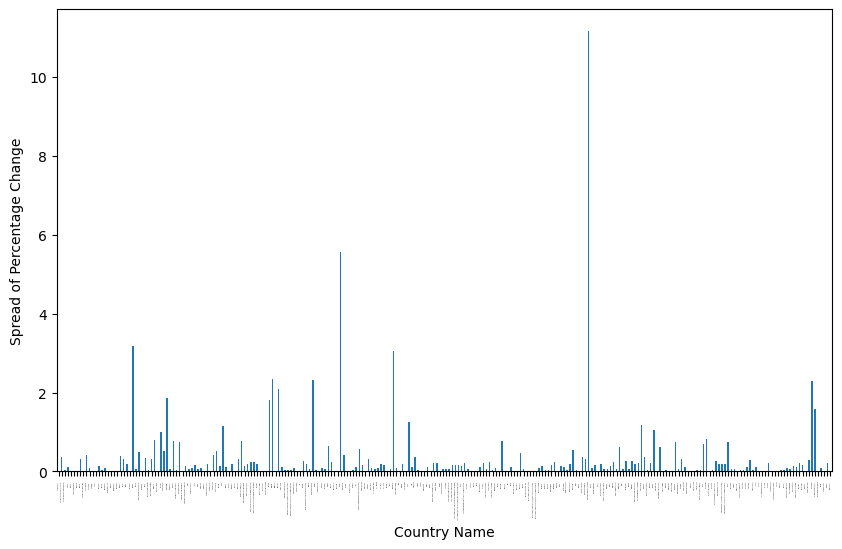

In [275]:
#Outlier analysis
#Calcualte the spread of deforestation rate for countries (max  - min)
spread_df = df_cleaned.groupby("Country Name")["Differenced_Value"].agg(lambda x: x.max() - x.min())
#Therefore it is reasonable to take the average per country


plt.figure(figsize=(10, 6))
spread_df.plot(kind = "bar")
plt.xticks(fontsize=0.4)  # Set the font size as desired (e.g., 6)
plt.ylabel('Spread of Percentage Change')
#plt.axhline(y=2, color='red', linestyle='--')
plt.show()


In [276]:
spread_df[spread_df>2] #The difference between maximum percentage change and minimum percentage is larger than %2
countries_with_large_spread = (spread_df[spread_df>2]).index.to_list()
df_filtered = df_cleaned[~df_cleaned['Country Name'].isin(countries_with_large_spread)]#Removing those countries
print(spread_df[spread_df>2])

Country Name
Bhutan                       3.183103
Estonia                      2.337298
Ethiopia                     2.087149
French Polynesia             2.322601
Guam                         5.555556
Indonesia                    3.046724
Northern Mariana Islands    11.152174
Viet Nam                     2.301372
Name: Differenced_Value, dtype: float64


In [277]:
df_cleaned.isna().sum()

Country Name         0
Year                 0
Differenced_Value    0
dtype: int64

# Poteantial explanations for the outliers?

In [278]:
df_cleaned[df_cleaned["Country Name"] == "Northern Mariana Islands"] #Just tot look at the forest rate coverage 

,Country Name,Year,Differenced_Value
154,Northern Mariana Islands,2000,-0.358696
404,Northern Mariana Islands,2001,-0.356522
654,Northern Mariana Islands,2002,-0.356522
904,Northern Mariana Islands,2003,-0.356522
1154,Northern Mariana Islands,2004,-0.356522
1404,Northern Mariana Islands,2005,-0.356522
1654,Northern Mariana Islands,2006,-0.356522
1904,Northern Mariana Islands,2007,-0.356522
2154,Northern Mariana Islands,2008,-0.356522
2404,Northern Mariana Islands,2009,-0.356522


In [279]:
average_deforestation = df_filtered.groupby("Country Name")["Differenced_Value"].mean()  #Taking the average
#Now this becomes the average percentage change at the last 20 years (For example: For Albania the average deforestation rate is 0.035%)
average_deforestation

Country Name
Afghanistan                    0.000000
Africa Eastern and Southern   -0.223342
Africa Western and Central    -0.090064
Albania                        0.029280
Algeria                        0.007071
                                 ...   
West Bank and Gaza             0.007940
World                         -0.041150
Yemen, Rep.                    0.000000
Zambia                        -0.150660
Zimbabwe                      -0.119090
Name: Differenced_Value, Length: 242, dtype: float64

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



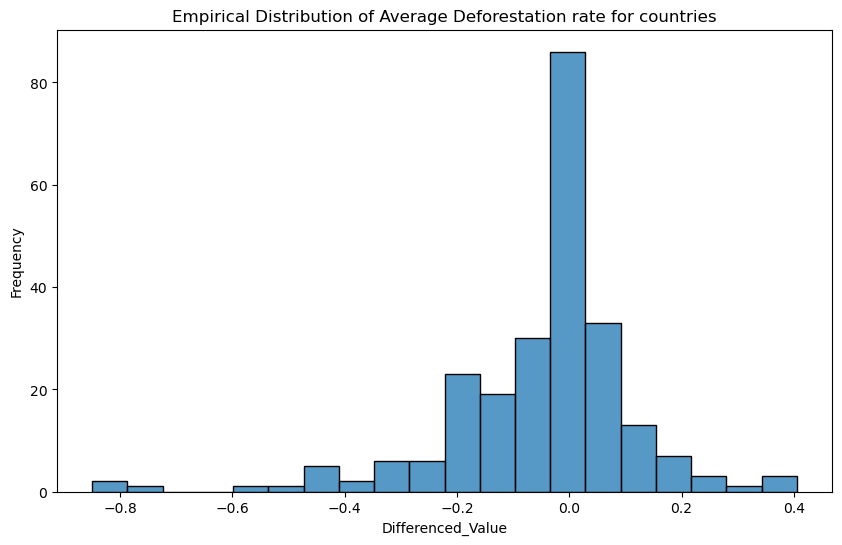

In [280]:
plt.figure(figsize=(10,6))
sns.histplot(average_deforestation, bins=20, kde=False, edgecolor='black')

# Add labels and title
plt.xlabel('Differenced_Value')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Average Deforestation rate for countries')

# Show the plot
plt.show()

### **Research Question**: What is the effect of agricultural land expansion rate of corn fields on deforestation rate of countries by controlling for land size of countries?     

In [281]:
corn_field_data = pd.read_csv('./Data/FAOSTAT_data_en_10-2-2024.csv')
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1961,1961,ha,500000,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1962,1962,ha,500000,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1963,1963,ha,500000,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1964,1964,ha,505000,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1965,1965,ha,500000,A,Official figure,NaN


In [282]:
corn_field_data.isna().sum()

Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Element Code           0
Element                0
Item Code (CPC)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                  0
Flag                   0
Flag Description       0
Note                9209
dtype: int64

In [283]:
#Filtering the data between 2000 and 2021
corn_field_data = corn_field_data[(corn_field_data['Year'] >= 2000) & (corn_field_data['Year'] <= 2021)]

In [284]:
#Shape of the data
corn_field_data.shape

(3669, 15)

In [285]:
corn_field_data["Note"].unique()

array([nan, 'Unofficial figure'], dtype=object)

In [286]:
corn_field_data["Flag Description"].unique()

array(['Official figure', 'Estimated value', 'Imputed value',
       'Figure from international organizations',
       'Missing value (data cannot exist, not applicable)'], dtype=object)

In [287]:
corn_field_data = corn_field_data[(corn_field_data["Flag Description"] == "Official figure") & (corn_field_data["Note"] != "Unofficial figure")]

In [288]:
#Unique country amount: Does the number of countires in this data match with deforestation data?
print("Number of countries in the corn field dataset: ",len(corn_field_data["Area"].unique()))

Number of countries in the corn field dataset:  162


In [289]:
#The two columns are the same
print(len(corn_field_data["Year Code"] == corn_field_data["Year"]) == len(corn_field_data))
print(corn_field_data["Domain"].unique()[0])
print(corn_field_data["Element"].unique()[0])
print(corn_field_data["Item"].unique()[0])

corn_field_data = corn_field_data[["Area","Value"]] #extracting the necessary columns
corn_field_data.head(30)

True
Crops and livestock products
Area harvested
Maize (corn)


,Area,Value
39,Afghanistan,96000
40,Afghanistan,80000
41,Afghanistan,100000
42,Afghanistan,250000
43,Afghanistan,250000
44,Afghanistan,261000
45,Afghanistan,137000
46,Afghanistan,137000
47,Afghanistan,137000
48,Afghanistan,140000


In [290]:
areas_to_exclude = corn_field_data[corn_field_data["Value"] == 0]["Area"].unique() #These countries include 0 values
#Exclude these countries completely
corn_field_data = corn_field_data[~corn_field_data['Area'].isin(areas_to_exclude)]
corn_field_data.head()

,Area,Value
39,Afghanistan,96000
40,Afghanistan,80000
41,Afghanistan,100000
42,Afghanistan,250000
43,Afghanistan,250000


In [291]:
corn_field_data.dtypes #No need to convert the year column

Area     object
Value     int64
dtype: object

In [292]:
#Missing values
corn_field_data.isna().sum()

Area     0
Value    0
dtype: int64

In [293]:
#Calculating the corn field expansion rate
corn_field_exp_rt= corn_field_data.groupby("Area")["Value"].apply(lambda x: x.pct_change()*100)
corn_field_exp_rt_df = pd.DataFrame(corn_field_exp_rt).reset_index().drop("level_1", axis = 1)
#Dropping na values due to percentange change calculation
corn_field_exp_rt_df = corn_field_exp_rt_df.dropna()

C:\Users\Mert\AppData\Local\Temp\ipykernel_25644\1974753527.py:2: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.

C:\Users\Mert\AppData\Local\Temp\ipykernel_25644\1974753527.py:2: FutureWarning:

The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.



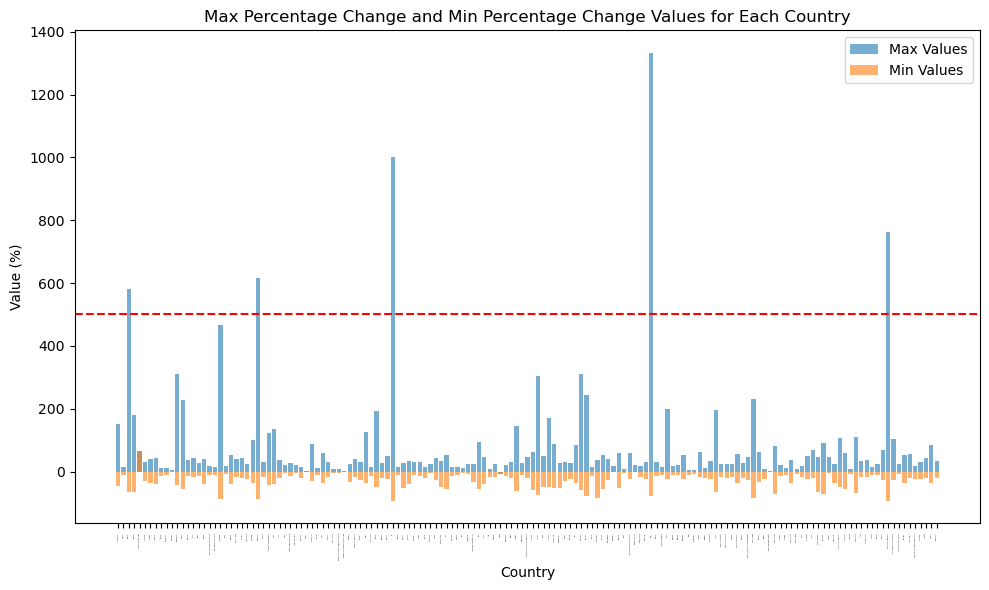

In [294]:
#Calcualtin gthe max-min percentage changes in corn field expansion rate
max_min_values = corn_field_exp_rt_df.groupby("Area")["Value"].agg([max, min])


# Plotting the max and min values for each country
plt.figure(figsize=(10, 6))

# Plot the max values
plt.bar(max_min_values.index, max_min_values['max'], label='Max Values', alpha=0.6)

# Plot the min values
plt.bar(max_min_values.index, max_min_values['min'], label='Min Values', alpha=0.6)

plt.xticks(fontsize=0.4)
# Add labels and title
plt.xlabel('Country')
plt.ylabel('Value (%)')
plt.title('Max Percentage Change and Min Percentage Change Values for Each Country')
plt.xticks(rotation=90)
plt.axhline(y=500, color='red', linestyle='--')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [295]:
#Excluding the outliers (Excluding %500 times expansion)
outlier_countries = max_min_values[(max_min_values["max"] > 500)].index
outlier_countries

Index(['Algeria', 'Cameroon', 'Fiji', 'Niger', 'United Arab Emirates'], dtype='object', name='Area')

In [296]:
#Calculating the average corn field expansion rate
avg_cornf_field_exp = corn_field_exp_rt_df.groupby("Area")["Value"].mean()
#Excluding outliers
cleaned_cornf_field_exp = avg_cornf_field_exp[~avg_cornf_field_exp.index.isin(outlier_countries)]
cleaned_cornf_field_exp

Area
Afghanistan                            7.371932
Albania                                0.633505
Angola                                13.779700
Antigua and Barbuda                   66.666667
Argentina                              5.916717
                                        ...    
Venezuela (Bolivarian Republic of)    -0.365623
Viet Nam                               1.495423
Yemen                                  1.898018
Zambia                                 8.643074
Zimbabwe                              -1.037873
Name: Value, Length: 148, dtype: float64

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Value', ylabel='Count'>

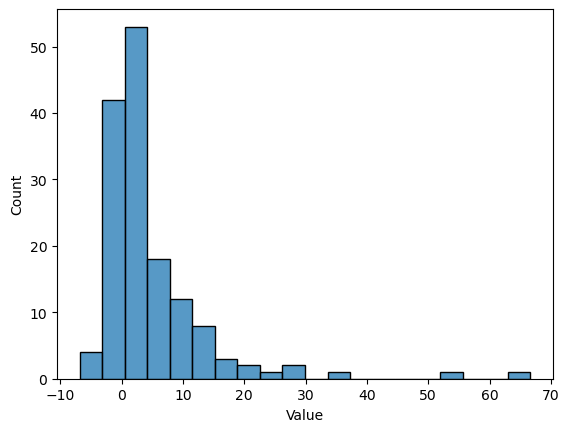

In [297]:
sns.histplot(cleaned_cornf_field_exp, bins=20, kde=False, edgecolor='black')

# Land Size

In [298]:
# Get data for 'Land area (sq. km)' for all countries
indicators = {'AG.LND.TOTL.K2': 'Land area (sq. km)'}
data = wbdata.get_dataframe(indicators)

# Display the land area for all countries
org_data = data.reset_index()

#Converting the year column to integer
org_data['date'] = org_data['date'].astype(int)

org_data.head()


,country,date,Land area (sq. km)
0,Africa Eastern and Southern,2023,NaN
1,Africa Eastern and Southern,2022,NaN
2,Africa Eastern and Southern,2021,1.484509e+07
3,Africa Eastern and Southern,2020,1.484509e+07
4,Africa Eastern and Southern,2019,1.484513e+07


In [299]:
filtered_data = org_data[(org_data['date'] >= 2000) & (org_data['date'] <= 2021)]
avg_land_size_df = filtered_data.groupby('country').agg(  # Count of unique values per country
    Average_Land_Size=('Land area (sq. km)', 'mean')     # Average of the values per country
)
avg_land_size_df

,Average_Land_Size
country,
Afghanistan,6.522300e+05
Africa Eastern and Southern,1.475005e+07
Africa Western and Central,9.045779e+06
Albania,2.740000e+04
Algeria,2.381740e+06
...,...
West Bank and Gaza,6.020227e+03
World,1.298152e+08
"Yemen, Rep.",5.279700e+05


# Result

In [300]:
avg_land_size_df= avg_land_size_df.reset_index()
avg_land_size_df.head()

,country,Average_Land_Size
0,Afghanistan,6.522300e+05
1,Africa Eastern and Southern,1.475005e+07
2,Africa Western and Central,9.045779e+06
3,Albania,2.740000e+04
4,Algeria,2.381740e+06


In [301]:
cleaned_corn_df = pd.DataFrame(cleaned_cornf_field_exp).reset_index()
cleaned_corn_df.head()

,Area,Value
0,Afghanistan,7.371932
1,Albania,0.633505
2,Angola,13.779700
3,Antigua and Barbuda,66.666667
4,Argentina,5.916717


In [302]:
cleaned_def = pd.DataFrame(average_deforestation).reset_index()
cleaned_def.head()

,Country Name,Differenced_Value
0,Afghanistan,0.000000
1,Africa Eastern and Southern,-0.223342
2,Africa Western and Central,-0.090064
3,Albania,0.029280
4,Algeria,0.007071


In [303]:
# Reverting to previous data before dropping and then manually resolving country mismatches
country_mapping = {
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'United States',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Türkiye': 'Turkey',
    'Africa Eastern and Southern': 'Eastern and Southern Africa',
    'Africa Western and Central': 'Western and Central Africa',
    # You can add more mappings if necessary
}

# Rename columns again to 'Country'
avg_land_size_df.rename(columns={'country': 'Country'}, inplace=True)
cleaned_corn_df.rename(columns={'Area': 'Country'}, inplace=True)
cleaned_def.rename(columns={'Country Name': 'Country'}, inplace=True)

avg_land_size_df['Country'] = avg_land_size_df['Country'].replace(country_mapping)
cleaned_corn_df['Country'] = cleaned_corn_df['Country'].replace(country_mapping)
cleaned_def['Country'] = cleaned_def['Country'].replace(country_mapping)


# Merging dataframes without dropping any countries, and will handle missing data
final_merged_df = pd.merge(avg_land_size_df, cleaned_corn_df, on='Country', how='outer')
final_merged_df = pd.merge(final_merged_df, cleaned_def, on='Country', how='outer')

final_merged_df


,Country,Average_Land_Size,Value,Differenced_Value
0,Afghanistan,6.522300e+05,7.371932,0.000000
1,Albania,2.740000e+04,0.633505,0.029280
2,Algeria,2.381740e+06,NaN,0.007071
3,American Samoa,2.000000e+02,NaN,-0.150909
4,Andorra,4.700000e+02,NaN,0.000000
...,...,...,...,...
284,World,1.298152e+08,NaN,-0.041150
285,Yemen,NaN,1.898018,NaN
286,"Yemen, Rep.",5.279700e+05,NaN,0.000000
287,Zambia,7.433900e+05,8.643074,-0.150660


In [304]:
# Define the function to detect duplicates, group by partition, fill values with zeros, and sum them up
def consolidate_duplicates(df, country_column):
    # Make a copy of the dataframe to avoid modifying the original one
    df_copy = df.copy()
    
    # Standardize country names for consistency (can extend this part to include more mappings if necessary)
    df_copy[country_column] = df_copy[country_column].replace({
        "Cote d'Ivoire": "Côte d'Ivoire",
        "Democratic Republic of the Congo": "Congo, Dem. Rep.",
        "Korea, Rep.": "South Korea",
        "Korea, Dem. People's Rep.": "North Korea",
        "Egypt, Arab Rep.": "Egypt",
        "Iran (Islamic Republic of)": "Iran, Islamic Rep.",
        "Netherlands (Kingdom of the)" : "Netherlands",
        "Slovak Republic" : "Slovakia",
        "Turkiye" : "Turkey",
        "Venezuela, RB" : "Veneuzela",
        "Yemen, Rep." : "Yemen",
        "Republic of Korea": "South Korea",
        "Republic of Moldova":"Moldova",
        "Kyrgyz Republic" : "Kyrgyzstan"
    })
    
    # Get the list of unique countries
    unique_countries = df_copy[country_column].unique()
    
    # Loop through unique countries
    result_list = []
    
    for country in unique_countries:
        # Filter the rows for the current country
        partition = df_copy[df_copy[country_column] == country]
        
        # If there are duplicates, group them by the country and sum the numeric values
        if len(partition) > 1:
            # Replace NaNs with zeros for aggregation
            partition = partition.fillna(0)
            
            # Sum the rows and keep the country name intact
            summed_partition = partition.groupby(country_column).sum().reset_index()
            
            # Append the result to the list
            result_list.append(summed_partition)
        else:
            # If there are no duplicates, keep the partition as it is
            result_list.append(partition)
    
    # Concatenate all results into a final dataframe
    final_df = pd.concat(result_list, ignore_index=True)
    
    return final_df

# Applying the function to the example data
final_grouped_df = consolidate_duplicates(final_merged_df, 'Country')

final_grouped_df["Country"] = final_grouped_df["Country"].replace({
        "Turkey": "Türkiye",
        "Congo, Dem. Rep.": "Congo",
        "Iran, Islamic Rep.": "Iran",

    })

final_grouped_df.head()


,Country,Average_Land_Size,Value,Differenced_Value
0,Afghanistan,6.522300e+05,7.371932,0.000000
1,Albania,2.740000e+04,0.633505,0.029280
2,Algeria,2.381740e+06,NaN,0.007071
3,American Samoa,2.000000e+02,NaN,-0.150909
4,Andorra,4.700000e+02,NaN,0.000000


In [305]:
#Now drop the rows with missing data
last_df = final_grouped_df.dropna()
last_df = last_df.reset_index(drop = True)

In [306]:
#Renaming the columns
last_df = last_df.rename({"Value":"Average_Corn_Field_Expansion_Rate(%)",
                          "Differenced_Value":"Average_Deforestation_Rate(%)"},axis = 1)
last_df

,Country,Average_Land_Size,Average_Corn_Field_Expansion_Rate(%),Average_Deforestation_Rate(%)
0,Afghanistan,652230.0,7.371932,0.000000
1,Albania,27400.0,0.633505,0.029280
2,Angola,1246700.0,13.779700,-0.430654
3,Antigua and Barbuda,440.0,66.666667,-0.151105
4,Argentina,2736690.0,5.916717,-0.084657
...,...,...,...,...
121,Uruguay,175020.0,8.683997,0.192212
122,Uzbekistan,437382.5,2.430806,0.071231
123,Yemen,527970.0,1.898018,0.000000
124,Zambia,743390.0,8.643074,-0.150660


In [307]:
# Function to get ISO3 code from country name
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None  # Return None if country is not found

# Apply the function to add a new column 'iso3'
last_df['iso3'] = last_df['Country'].apply(get_iso3)
last_df

,Country,Average_Land_Size,Average_Corn_Field_Expansion_Rate(%),Average_Deforestation_Rate(%),iso3
0,Afghanistan,652230.0,7.371932,0.000000,AFG
1,Albania,27400.0,0.633505,0.029280,ALB
2,Angola,1246700.0,13.779700,-0.430654,AGO
3,Antigua and Barbuda,440.0,66.666667,-0.151105,ATG
4,Argentina,2736690.0,5.916717,-0.084657,ARG
...,...,...,...,...,...
121,Uruguay,175020.0,8.683997,0.192212,URY
122,Uzbekistan,437382.5,2.430806,0.071231,UZB
123,Yemen,527970.0,1.898018,0.000000,YEM
124,Zambia,743390.0,8.643074,-0.150660,ZMB


c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



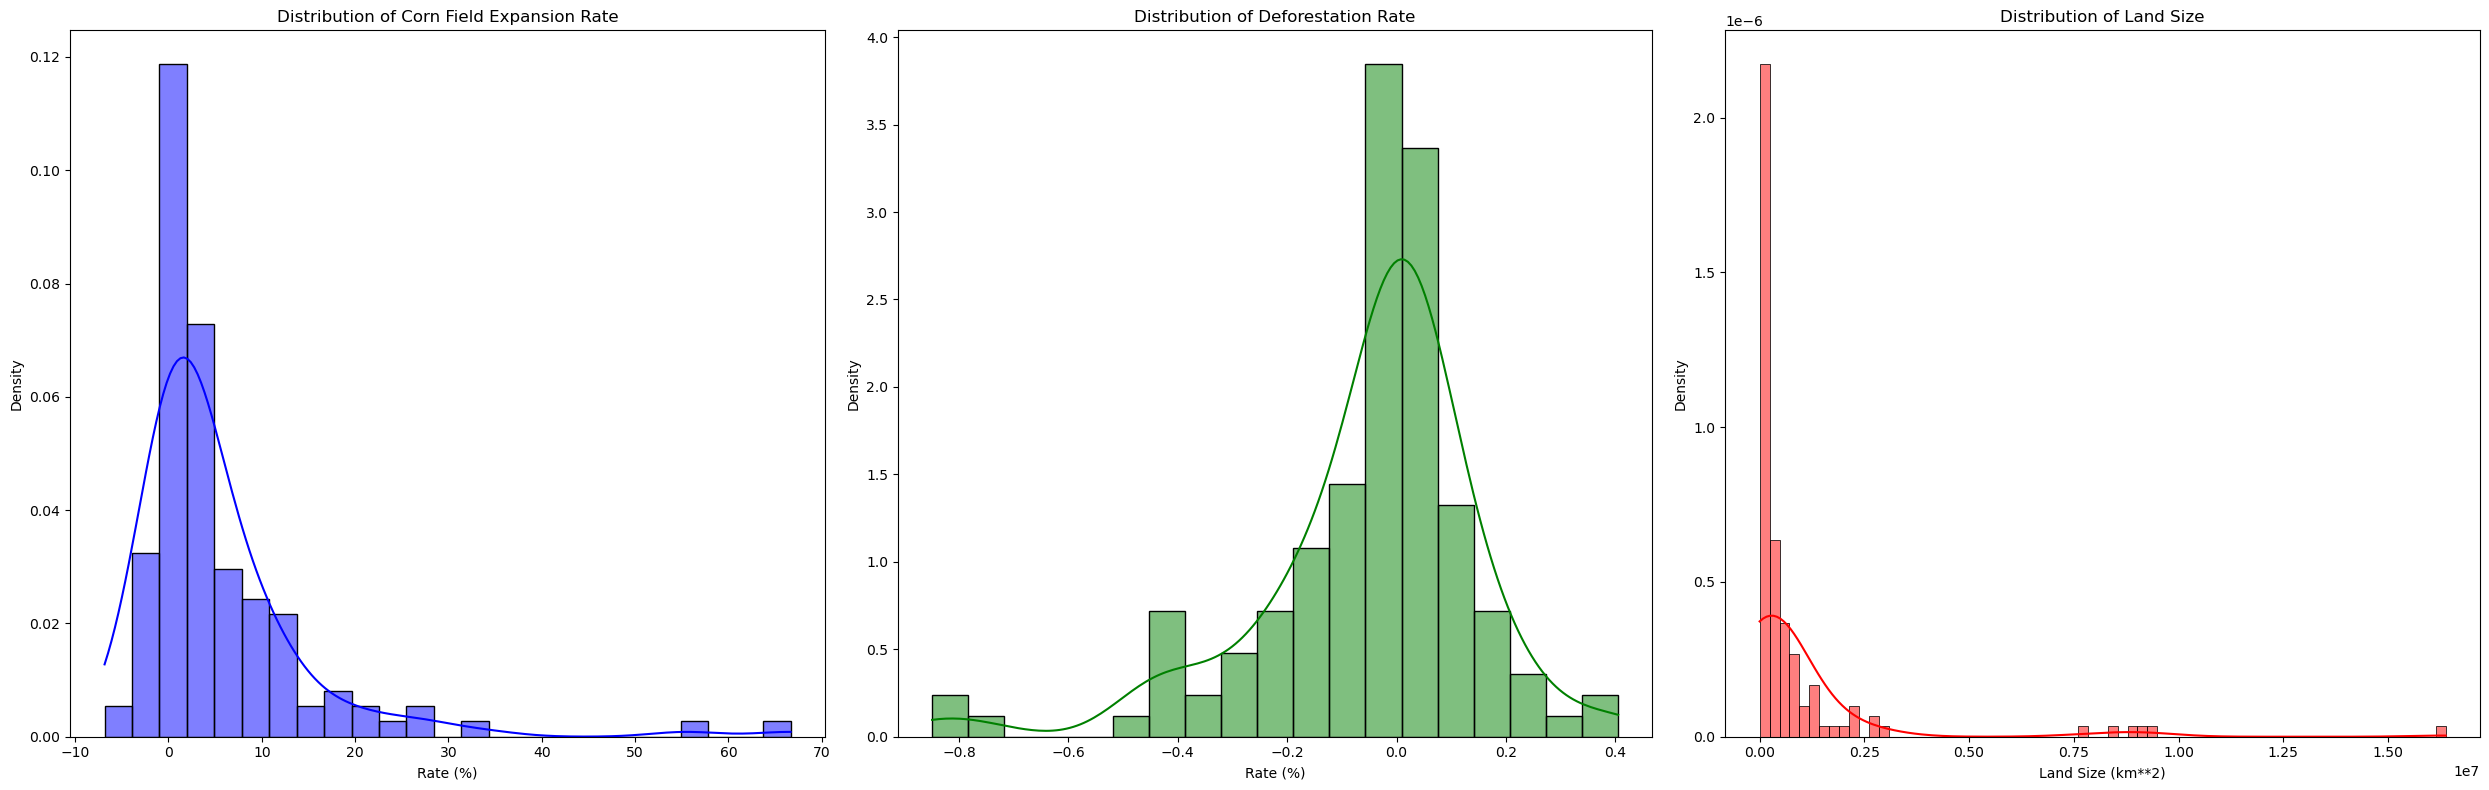

In [308]:
# Set up the matplotlib figure with two subplots next to each other
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

# Plot the distribution of Corn Field Expansion Rate in the first subplot
sns.histplot(last_df['Average_Corn_Field_Expansion_Rate(%)'], kde=True, color="blue", label="Corn Field Expansion Rate", stat="density", ax=axes[0])
axes[0].set_title("Distribution of Corn Field Expansion Rate")
axes[0].set_xlabel("Rate (%)")
axes[0].set_ylabel("Density")

# Plot the distribution of Deforestation Rate in the second subplot
sns.histplot(last_df['Average_Deforestation_Rate(%)'], kde=True, color="green", label="Deforestation Rate", stat="density", ax=axes[1])
axes[1].set_title("Distribution of Deforestation Rate")
axes[1].set_xlabel("Rate (%)")
axes[1].set_ylabel("Density")

sns.histplot(last_df["Average_Land_Size"], kde=True, color="red", label="Deforestation Rate", stat="density", ax=axes[2])
axes[2].set_title("Distribution of Land Size")
axes[2].set_xlabel("Land Size (km**2)")
axes[2].set_ylabel("Density")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [309]:
last_df.columns

Index(['Country', 'Average_Land_Size', 'Average_Corn_Field_Expansion_Rate(%)',
       'Average_Deforestation_Rate(%)', 'iso3'],
      dtype='object')

In [310]:
fig = px.choropleth(last_df, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='Average_Deforestation_Rate(%)',  # Average deforestation rates
                    hover_name='Country',
                    title = 'Average Deforestation Rate (%) per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [311]:
# Now plot the map with Plotly Express
fig = px.choropleth(last_df, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='Average_Corn_Field_Expansion_Rate(%)',  # Average deforestation rates
                    hover_name='Country',
                    title = 'Average Corn Field Expansion Rate per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [312]:
# Finding the median of Average_Land_Size
median_land_size = last_df['Average_Land_Size'].median()

# Creating a dummy variable for whether the land size is higher than the median
last_df['Higher_Than_Median'] = last_df['Average_Land_Size'].apply(lambda val: 1 if (val>median_land_size) else 0)

last_df.head()

,Country,Average_Land_Size,Average_Corn_Field_Expansion_Rate(%),Average_Deforestation_Rate(%),iso3,Higher_Than_Median
0,Afghanistan,652230.0,7.371932,0.000000,AFG,1
1,Albania,27400.0,0.633505,0.029280,ALB,0
2,Angola,1246700.0,13.779700,-0.430654,AGO,1
3,Antigua and Barbuda,440.0,66.666667,-0.151105,ATG,0
4,Argentina,2736690.0,5.916717,-0.084657,ARG,1


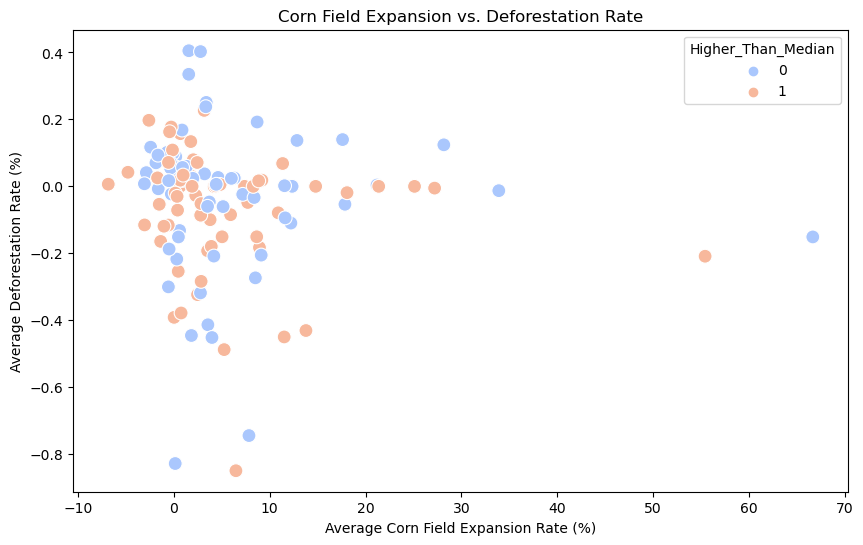

In [313]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=last_df, 
                x='Average_Corn_Field_Expansion_Rate(%)', 
                y='Average_Deforestation_Rate(%)', 
                hue='Higher_Than_Median', 
                palette='coolwarm', 
                s=100)

# Adding labels and title
plt.title('Corn Field Expansion vs. Deforestation Rate')
plt.xlabel('Average Corn Field Expansion Rate (%)')
plt.ylabel('Average Deforestation Rate (%)')

# Display the plot
plt.show()

In [329]:
#Filtered data (only positive values)
positive_df = last_df[(last_df["Average_Deforestation_Rate(%)"]>0) &(last_df["Average_Corn_Field_Expansion_Rate(%)"]>0) ]
positive_df["log_corn"] = np.log(last_df["Average_Corn_Field_Expansion_Rate(%)"])
positive_df["log_forest"] = np.log(last_df["Average_Deforestation_Rate(%)"])
positive_df.head()


c:\Users\Mert\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log

C:\Users\Mert\AppData\Local\Temp\ipykernel_25644\3124195915.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Mert\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

c:\Users\Mert\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log

C:\Users\Mert\AppData\Local\Temp\ipykernel_25644\3124195915.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,Country,Average_Land_Size,Average_Corn_Field_Expansion_Rate(%),Average_Deforestation_Rate(%),iso3,Higher_Than_Median,log_corn,log_forest
1,Albania,27400.000000,0.633505,0.029280,ALB,0,-0.456488,-3.530850
7,Austria,82520.000000,0.898878,0.039025,AUT,0,-0.106608,-3.243561
8,Azerbaijan,82646.318182,0.196554,0.088532,AZE,0,-1.626819,-2.424387
10,Belarus,202910.045455,28.166856,0.124020,BLR,0,3.338146,-2.087311
13,Bosnia and Herzegovina,51200.000000,0.111626,0.058971,BIH,0,-2.192598,-2.830708


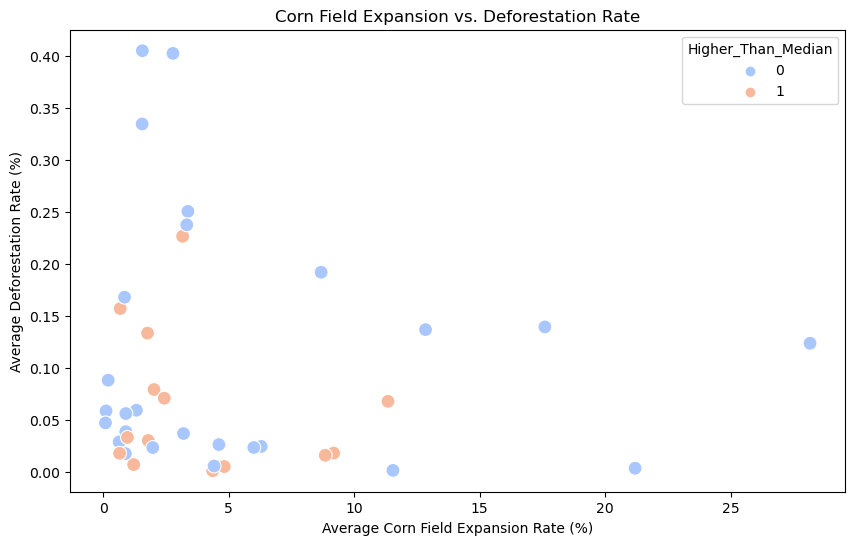

In [315]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=positive_df, 
                x='Average_Corn_Field_Expansion_Rate(%)', 
                y='Average_Deforestation_Rate(%)', 
                hue='Higher_Than_Median', 
                palette='coolwarm', 
                s=100)

# Adding labels and title
plt.title('Corn Field Expansion vs. Deforestation Rate')
plt.xlabel('Average Corn Field Expansion Rate (%)')
plt.ylabel('Average Deforestation Rate (%)')

# Display the plot
plt.show()

In [316]:

# Assuming you have your 'positive_df' DataFrame with 'Country', 'Average_Corn_Field_Expansion_Rate(%)',
# 'Average_Deforestation_Rate(%)', and 'Higher_Than_Median'

# Create an interactive scatter plot
fig = px.scatter(
    positive_df, 
    x='Average_Corn_Field_Expansion_Rate(%)', 
    y='Average_Deforestation_Rate(%)', 
    color='Higher_Than_Median', 
    hover_name='Country',  # Display country name on hover
    title='Corn Field Expansion vs. Deforestation Rate',
    labels={
        'Average_Corn_Field_Expansion_Rate(%)': 'Corn Field Expansion Rate (%)',
        'Average_Deforestation_Rate(%)': 'Deforestation Rate (%)'
    },
    size_max=100,
    template="plotly_white"
)

# Show the interactive plot
fig.show()


In [330]:
# Create an interactive scatter plot
fig = px.scatter(
    positive_df, 
    x='log_corn', 
    y='log_forest', 
    color='Higher_Than_Median', 
    hover_name='Country',  # Display country name on hover
    title='Corn Field Expansion vs. Deforestation Rate',
    labels={
        'Average_Corn_Field_Expansion_Rate(%)': 'Corn Field Expansion Rate (%)',
        'Average_Deforestation_Rate(%)': 'Deforestation Rate (%)'
    },
    size_max=100,
    template="plotly_white"
)

# Show the interactive plot
fig.show()

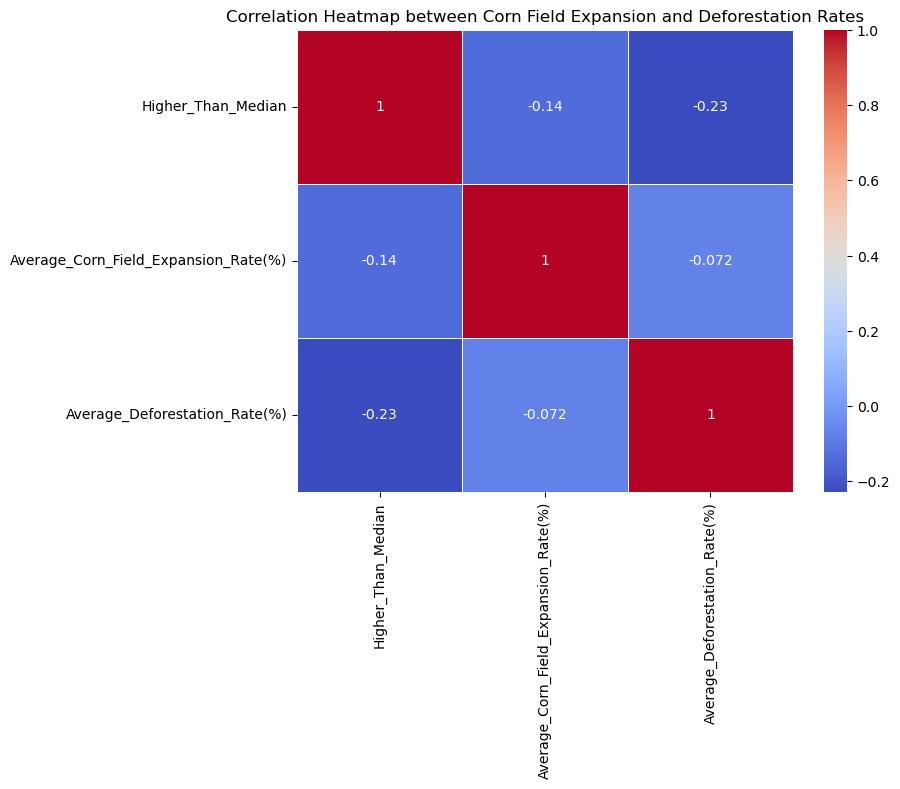

In [317]:
df_features = positive_df[['Higher_Than_Median','Average_Corn_Field_Expansion_Rate(%)', 'Average_Deforestation_Rate(%)']]

# Calculating the correlation matrix
correlation_matrix = df_features.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap between Corn Field Expansion and Deforestation Rates')
plt.show()

In [318]:
last_df.columns

Index(['Country', 'Average_Land_Size', 'Average_Corn_Field_Expansion_Rate(%)',
       'Average_Deforestation_Rate(%)', 'iso3', 'Higher_Than_Median'],
      dtype='object')

In [319]:
# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

# Sorting the data by 'Average_Land_Size' before plotting
last_df_sorted = last_df.sort_values(by='Average_Land_Size', ascending=False)

# Updating the bar plot with the sorted data
bar_grdp_sorted = bokeh.plotting.figure(
    frame_height=1200,
    frame_width=800,
    x_axis_label='Average_Land_Size',
    y_range = last_df_sorted["Country"][::-1],  # Sorting the y-axis based on the sorted data
)

bar_grdp_sorted.hbar(
    source=last_df_sorted,        # our sorted data
    y="Country",                  # Country on the y-axis
    right='Average_Land_Size',    # Average_Land_Size on the x-axis, to the right
    height=0.6                    # height of bars
)

# Turn off gridlines on categorical axis
bar_grdp_sorted.ygrid.grid_line_color = None

# Start axes at origin on quantitative axis
bar_grdp_sorted.x_range.start = 0

# Display the updated sorted plot
bokeh.io.show(bar_grdp_sorted)


Loading BokehJS ...

In [320]:
fig_box = px.box(last_df,                                           # Specify data frame
                 y=["Average_Corn_Field_Expansion_Rate(%)"],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Higher_Than_Median',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Average Corn Field Expansion Rate for land size bigger than median 
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box

c:\Users\Mert\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [321]:
fig_box = px.box(last_df,                                           # Specify data frame
                 y=["Average_Deforestation_Rate(%)"],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Higher_Than_Median',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Average Deforestation Rate for land size bigger than median 
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box

c:\Users\Mert\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Stat

**Null Hypothesis (H₀)**:
The sample data comes from the specified theoretical distribution

**Alternative Hypothesis (H₁)**:
The sample data does not come from the specified theoretical distribution.

#### Test Statistic for the K-S Test

The **K-S statistic** is defined as the maximum absolute difference between the empirical cumulative distribution function (ECDF) of the sample data and the cumulative distribution function (CDF) of the theoretical distribution:

$$
D_n = \sup_x \left| F_n(x) - F(x) \right|
$$

where:

- $ D_n $ is the **Kolmogorov-Smirnov test statistic**.
- $ F_n(x) $ is the **empirical distribution function** (ECDF) of the sample.
- $ F(x) $ is the **cumulative distribution function** (CDF) of the theoretical distribution.
- $ \sup_x $ means the **supremum** (i.e., the maximum value over all $ x $).


In [322]:
def fit_distributions_and_ks_test(data_column):
    
    # Drop NaN values from the column
    data = data_column.dropna()

    # Define a list of distributions to check
    distributions = ['norm', 'expon', 'lognorm', 'gamma', 'beta']

    # Initialize a dictionary to store the K-S test results
    ks_results = {}

    # Iterate over each distribution and perform the K-S test
    for distribution in distributions:
        # Get the distribution object from scipy.stats
        dist = getattr(stats, distribution)
        
        # Fit the distribution parameters to the data
        params = dist.fit(data)
        
        # Perform the K-S test
        ks_stat, p_value = stats.kstest(data, distribution, args=params)
        
        # Store the K-S test results
        ks_results[distribution] = {'K-S Statistic': ks_stat, 'p-value': p_value, 'params': params}

    # Convert the results to a DataFrame for better presentation
    ks_results_df = pd.DataFrame(ks_results).T

    return ks_results_df


result_df = fit_distributions_and_ks_test(last_df['Average_Corn_Field_Expansion_Rate(%)'])
result_df



c:\Users\Mert\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6471: RuntimeWarning:

invalid value encountered in log

c:\Users\Mert\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning:

invalid value encountered in sqrt

c:\Users\Mert\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:723: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



,K-S Statistic,p-value,params
norm,0.20361,0.000047,"(5.372524369229271, 9.840374833193911)"
expon,0.284245,0.0,"(-6.849315068493156, 12.221839437722426)"
lognorm,0.097135,0.173632,"(0.5205023306690594, -8.49320935691167, 11.895..."
gamma,0.976266,0.0,"(0.1537612526795012, -6.849315068493157, 1.765..."
beta,0.130634,0.024635,"(2.683367145077997, 19997249548101.973, -7.249..."


In [323]:
def plot_empirical_vs_fitted(data_column, distribution_name, params):
    """
    Plot the empirical distribution of the data and the fitted theoretical distribution.

    Parameters:
    - data_column: pandas Series containing the data.
    - distribution_name: name of the distribution to plot (e.g., 'lognorm').
    - params: parameters of the fitted distribution.
    """
    # Drop NaN values from the data
    data = data_column.dropna()

    # Set up the figure
    plt.figure(figsize=(10, 6))

    # Plot the empirical distribution
    sns.histplot(data, bins=30, kde=False, stat='density', label='Empirical', color='blue')

    # Get the fitted distribution
    dist = getattr(stats, distribution_name)
    
    # Create a range of values from the data
    x = np.linspace(data.min(), data.max(), 1000)
    
    # Get the probability density function (PDF) for the fitted distribution
    fitted_pdf = dist.pdf(x, *params)
    
    # Plot the fitted distribution
    plt.plot(x, fitted_pdf, label=f'{distribution_name.capitalize()} Fitted', color='red')

    # Add titles and labels
    plt.title(f'Empirical vs Fitted {distribution_name.capitalize()} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()

C:\Users\Mert\AppData\Local\Temp\ipykernel_25644\2223818991.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



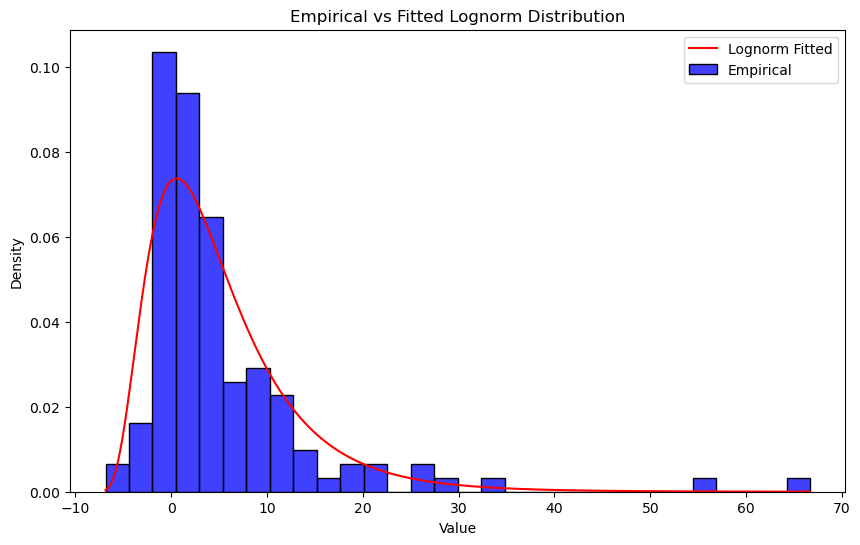

In [324]:
lognorm_params = result_df[result_df.index == "lognorm"]["params"][0]  # From your dataframe
plot_empirical_vs_fitted(last_df['Average_Corn_Field_Expansion_Rate(%)'], 'lognorm', lognorm_params)


In [325]:
res_df = fit_distributions_and_ks_test(last_df['Average_Deforestation_Rate(%)'])
res_df

c:\Users\Mert\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6471: RuntimeWarning:

invalid value encountered in log

c:\Users\Mert\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning:

invalid value encountered in sqrt

c:\Users\Mert\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:723: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



,K-S Statistic,p-value,params
norm,0.155171,0.004084,"(-0.050597502642670676, 0.20337346127641226)"
expon,0.411894,0.0,"(-0.8493861176578263, 0.7987886150151556)"
lognorm,0.156702,0.003613,"(0.0018136049871709274, -112.18558935555927, 1..."
gamma,0.173244,0.00089,"(250.90708354118385, -3.46161214317259, 0.0135..."
beta,1.0,0.0,"(4938383.818112783, 2.1473905757808662, -1.640..."


C:\Users\Mert\AppData\Local\Temp\ipykernel_25644\4267838316.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



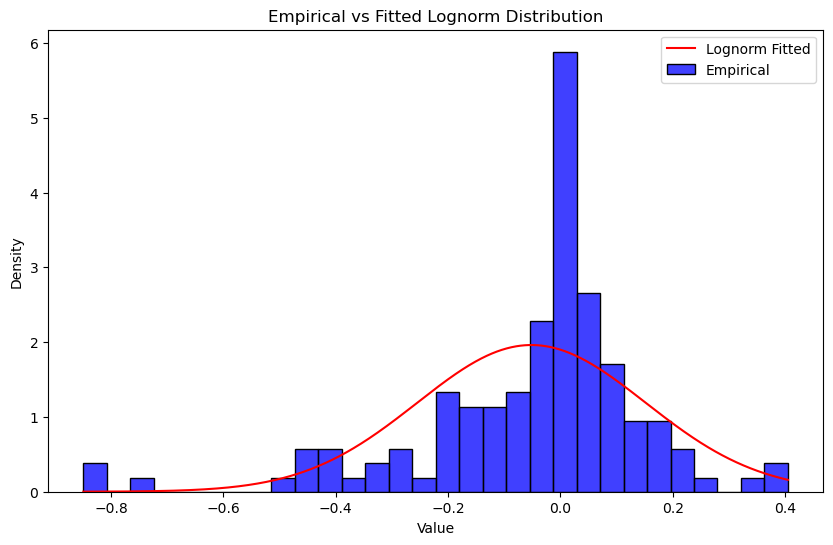

In [326]:
lognorm_params = res_df[res_df.index == "lognorm"]["params"][0]  # From your dataframe
plot_empirical_vs_fitted(last_df['Average_Deforestation_Rate(%)'], 'lognorm', lognorm_params)

### Skewness and Curtosis

In [332]:
# Calculate skewness and kurtosis for the two columns
skewness_deforestation = last_df['Average_Deforestation_Rate(%)'].skew()
kurtosis_deforestation = last_df['Average_Deforestation_Rate(%)'].kurtosis()

skewness_corn_expansion = last_df['Average_Corn_Field_Expansion_Rate(%)'].skew()
kurtosis_corn_expansion = last_df['Average_Corn_Field_Expansion_Rate(%)'].kurtosis()

# Create a DataFrame to store the results
stats_df = pd.DataFrame({
    'Skewness': {
        'Average_Deforestation_Rate(%)': skewness_deforestation,
        'Average_Corn_Field_Expansion_Rate(%)': skewness_corn_expansion
    },
    'Kurtosis': {
        'Average_Deforestation_Rate(%)': kurtosis_deforestation,
        'Average_Corn_Field_Expansion_Rate(%)': kurtosis_corn_expansion
    }
})

stats_df

,Skewness,Kurtosis
Average_Deforestation_Rate(%),-1.357330,3.497001
Average_Corn_Field_Expansion_Rate(%),3.479456,16.339781


In [327]:
X = sm.add_constant(positive_df[["Average_Corn_Field_Expansion_Rate(%)"]])

# Dependent variable (Y)
Y = positive_df["Average_Deforestation_Rate(%)"]

# Fit the OLS regression model
ols_model = sm.OLS(np.log(Y), np.log(X)).fit()

# Display the OLS regression results
ols_results_extended = ols_model.summary()
ols_results_extended

c:\Users\Mert\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning:

divide by zero encountered in scalar divide



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     Average_Deforestation_Rate(%)   R-squared (uncentered):                   0.318
Model:                                       OLS   Adj. R-squared (uncentered):              0.300
Method:                            Least Squares   F-statistic:                              18.18
Date:                           Wed, 16 Oct 2024   Prob (F-statistic):                    0.000124
Time:                                   02:06:07   Log-Likelihood:                         -98.018
No. Observations:                             40   AIC:                                      198.0
Df Residuals:                                 39   BIC:                                      199.7
Df Model:                                      1                                                  
Covariance Type:                       nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                         0          0        nan        nan           0           0
Average_Corn_Field_Expansion_Rate(%)    -1.2074      0.283     -4.263      0.000      -1.780      -0.635
==============================================================================
Omnibus:                        0.961   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.849
Skew:                           0.072   Prob(JB):                        0.654
Kurtosis:                       2.301   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""